<a href="https://colab.research.google.com/github/teeloren/freecodecamp/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
# Import data
df = pd.read_csv(
    'https://raw.githubusercontent.com/teeloren/freecodecamp/main/medical_examination.csv')

# Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
#        'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
#       dtype='object')

df['overweight'] = df['weight']/(df['height']**2)*10000
over = df['overweight'] > 25
df.loc[over, 'overweight'] = 1

under = df['overweight'] != 1
df.loc[under, 'overweight'] = 0

df.overweight = df.overweight.astype('int64')

over_ch = df['cholesterol'] == 1
df.loc[over_ch, 'cholesterol'] = 0

under_ch = df['cholesterol'] != 0
df.loc[under_ch, 'cholesterol'] = 1

over_gluc = df['gluc'] == 1
df.loc[over_gluc, 'gluc'] = 0

under_gluc = df['gluc'] != 0
df.loc[under_gluc, 'gluc'] = 1



cat_melt2 = pd.melt(df, id_vars='cardio', value_vars=[
    'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


df.info



<bound method DataFrame.info of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            0     0   
1          1  20228       1     156    85.0    140     90            1     0   
2          2  18857       1     165    64.0    130     70            1     0   
3          3  17623       2     169    82.0    150    100            0     0   
4          4  17474       1     156    56.0    100     60            0     0   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            0     0   
69996  99995  22601       1     158   126.0    140     90            1     1   
69997  99996  19066       2     183   105.0    180     90            1     0   
69998  99998  22431       1     163    72.0    135     80            0     1   
69999  99999  20540       1     170    72.0    120     80            1     0   

       

In [24]:
summary = {
    "Feature": ['Age','Height','Weight','Gender','Systolic blood pressure','Diastolic blood pressure','Cholesterol','Glucose','Smoking','Alcohol intake','Physical activity','Presence or absence of cardiovascular disease'],
    "Variable Type": ['Objective Feature','Objective Feature','Objective Feature','Objective Feature','Examination Feature','Examination Feature','Examination Feature','Examination Feature','Subjective Feature','Subjective Feature','Subjective Feature','Target Variable'],
    "Variable": ['age','height','weight','gender','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio'],
    "Value Type": ['int (days)','int (cm)','float (kg)','categorical code','int','int','1: normal, 2: above normal, 3: well above normal','1: normal, 2: above normal, 3: well above normal','binary','binary','binary','binary']
}
df_summary = pd.DataFrame(summary)
df_summary



,Feature,Variable Type,Variable,Value Type
0,Age,Objective Feature,age,int (days)
1,Height,Objective Feature,height,int (cm)
2,Weight,Objective Feature,weight,float (kg)
3,Gender,Objective Feature,gender,categorical code
4,Systolic blood pressure,Examination Feature,ap_hi,int
5,Diastolic blood pressure,Examination Feature,ap_lo,int
6,Cholesterol,Examination Feature,cholesterol,"1: normal, 2: above normal, 3: well above normal"
7,Glucose,Examination Feature,gluc,"1: normal, 2: above normal, 3: well above normal"
8,Smoking,Subjective Feature,smoke,binary
9,Alcohol intake,Subjective Feature,alco,binary


In [ ]:
cardio_zero = (cat_melt2['cardio'] == 0)
cardio_one = (cat_melt2['cardio'] != 0)
car_one = cat_melt2[cardio_one]
car_zero = cat_melt2[cardio_zero]


combine = pd.concat([car_zero, car_one]).value_counts()
combine = pd.DataFrame(combine)
combine = combine.reset_index()
combine = combine.rename(columns={0:'total'})
combine = combine.sort_values('variable')
combine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x360 with 0 Axes>

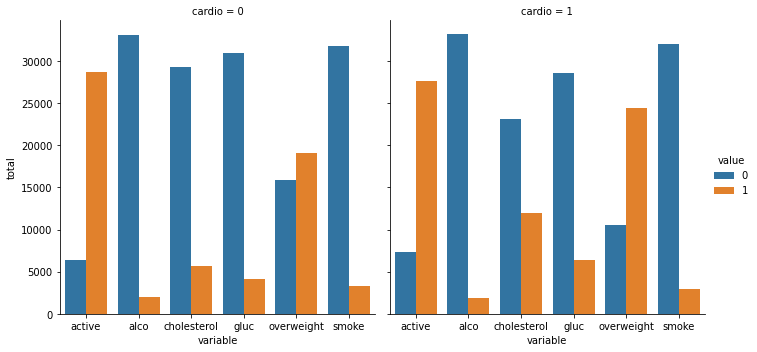

<Figure size 1440x360 with 0 Axes>

In [13]:
from google.colab import files

sns.catplot(x='variable',y='total', data=combine, kind='bar', hue='value', col="cardio")
fig = plt.figure(figsize=(20, 5))
plt.savefig('catplot_medical.png')
files.download('catplot_medical.png')
fig

# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = None

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None

    # Set up the matplotlib figure
    fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


In [ ]:
df_heat = df
df_heat = df[(df['ap_lo'] <= df['ap_hi'])]
df_heat = df[(df['height'] >= df['height'].quantile(0.025))]
df_heat = df[(df['height'] <= df['height'].quantile(0.975))]
df_heat = df[(df['weight'] >= df['weight'].quantile(0.025))]
df_heat = df[(df['weight'] <= df['weight'].quantile(0.975))]

df_heat

In [ ]:
# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_heat.corr()))
corr

In [ ]:

# # Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,9))
# ax.plot(df_heat, df_heat)


# # Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(
    corr, mask=mask,  
    square=True , annot=True, fmt=".1f" ,
    linewidths=.5,
     vmin=-.1, vmax=.3, cmap='gist_heat', center=0.08)#, 'inferno_r', 'jet', 'jet_r', 'mag...
